# <center> **PROJECT DESCRIPTION** </center>
Spotify is the most well known music database/streaming service that allows users to enjoy millions of their favorite songs every day. According to the company itself, there are around 100 mln unique tracks, 7 mln podcasts and 350 thsnd audiobooks. 
Spotify has over 700 mln users from more than 180 markets. 

## <center> **PROJECT AIM** </center>
Main goal of this project is to group the tracks in a sample to similar groups and check how those groups differ, for what type of activities they are suitable the most. 

## <center> **DATASET** </center>
Unfortunately in December 2025 Spotify has turned off the ability to create the developer apps, so the utilization of API to gather data at the moment of creating this project is impossible. For this reason, in order to complete the project I utilized data from [Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data)  which has been gathered using Spotify API prior to Jan 2026.

### <center>This dataset contains the tracks gathered from Spotify API and their respective features, which descriptions can be found down below:</center>
- **track_id** - unique identifier of the song on Spotify.
-  **artist** - name of the artist/artists performing the song.
-  **album_name** - name of the album out of which the song comes from.
-  **track_name** - name of the song.
-  **popularity** - popularity of an artist, calculated based on the popularity of artist's all tracks. Its value ranges from 0 to 100, where 100 is the most popular.
-  **duration_ms** - duration of the song in milliseconds. 
-  **explicit** - information if the track contains the explicit lyrics (True = yes, False = no)
-  **danceability** - describes how suitable for dancing the track is. It is based on the combination of musical features eg. rhythm stability, regularity or tempo. Its values range from 0 to 1, where 1 is the most danceable.
-  **energy** - measures intensity and activity of the track. It is perceptual and based on features like perceived loudness or dynamic range. 
-  **key** - The key of the track is in. It maps to standard Pitch Class notation eg. 0=C, 1=C♯. If no key was detected, it gets value of -1. Range: between -1 and 11.
-  **loudness** - Overall loudness of track in dB. This is the average value out of the whole song, so it's easier to compare various songs. Values range between -60 to 0 dB.
-  **mode** - binary variable, it indicates the type of scale of melodic content. Major is represented by 1 and minor is 0.
-  **speechiness** - detects the presence of spoken words in the track. Values range between 0 and 1, where above 0.66 suggest that the track is mostly spoken words and below 0.33 that there's mostly music.
-  **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
-  **instrumentalness** - predicts whether a track contains no vocals. The closer this value is to 1, the higher likelihood the track contains no vocal content. Values range from 0 to 1.
-  **liveness** - Values range from 0 to 1. The closer to 1, the higher the probability that the track was performed live.
-  **valence** - Ranges from 0 to 1. Tracks with valence closer to 1 sound more positive, while those with valence closer to 0 are more negative eg. sad, angry.
-  **tempo** - overall estimated tempo measured in BPM (beats per minute).
-  **time_signature** - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
-  **track_genre** - genres of a track. 

For more detailed info, please visit the official Spotify API [documentation](https://developer.spotify.com/documentation/web-api).


## <center> **PROJECT ROADMAP** </center>
1. **Exploratory Data Analysis** 
    - Load the dataset
    - Remove duplicated and null values (necessary for further modeling)
    - Choose the data sample randomly (10 000 records)
    - Understand the nature of the music data
    - Visualize distributions of the variables
    - Create a correlation plot which will help to understand relationships between variables and make a good choices further in the project

2. **1<sup>st</sup> Clustering**
    - Standardize data
    - Check the suitability of data for clustering using the Hopkins test
    - Use elbow method and silhouette score to determine how many clusters to choose 
    - Cluster the data using KMeans algorithm
  
3. **Dimension Reduction**
    - perform dimension reduction using PCA
    - reduce dimensions till maximum information loss is equal to 10% of variance explained
    - determine the number of clusters for 2<sup>nd</sup> iteration

4. **2<sup>nd</sup> Clustering**
    - Conduct second iteration of clustering with the reduced dimensions
  
5. **Compare the results**
   - Use Adjusted Rand Index to compare both models


In [1]:
# handling system/environment
import os
from dotenv import load_dotenv
import re
import locale

# loading the .env file with API credentials
load_dotenv()
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

# importing kaggle and authenticating for data loading
import kaggle
kaggle.api.authenticate()

# EDA 
import pandas as pd
import numpy as np
import math

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# clustering
from pyclustertend import hopkins
from pyclustertend import vat
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from gap_statistic import OptimalK
from sklearn.metrics import adjusted_rand_score

# dimension reduction
from sklearn.decomposition import PCA

# setting global random seed
np.random.seed(7)



In [2]:
locale.setlocale(locale.LC_TIME, 'C')
kaggle.api.dataset_download_files('maharshipandya/-spotify-tracks-dataset', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset


In [3]:
# loading all csv files from directory in case of the file name change

def load_csv():
    cwd = os.getcwd()
    
    pattern = re.compile(r'\.csv$', re.IGNORECASE)

    files = os.listdir(cwd)
    
    csv = [f for f in files if pattern.search(f)]

    if not csv:
        print('No csvs in working directory')
        return None
    
    dframes = {}
    
    for file in csv:
        df = pd.read_csv(file)
        

    return df

df = load_csv()

In [4]:
#viewing the dataframe
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
# dropping artificially created index and track_genre since they are not needed for the analysis
df = df.drop(columns='Unnamed: 0')

In [7]:
# checking for duplicates in the dataset 
df[df.duplicated(subset='track_id') == True].sort_values(by = 'track_id', ascending = False)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative
91401,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,rock
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
107898,7zumacGldlmxpoP8bpaeLe,Squeeze,Greatest Hits,Slap & Tickle,24,256839,False,0.585,0.805,11,-14.211,0,0.0344,0.007390,0.000828,0.0699,0.919,131.820,4,synth-pop
88279,7zubR9uYAWjb5KPZTMm85e,Jhayco;Anuel AA,El perreo es el futuro,Ley Seca,0,263666,False,0.759,0.843,8,-3.718,1,0.0913,0.127000,0.000000,0.1140,0.560,105.016,4,reggae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94239,004h8smbIoAkUNDJvVKwkG,Ouse;Powfu,Loners Diary,Lovemark,58,219482,True,0.808,0.331,5,-13.457,1,0.0557,0.131000,0.000000,0.2250,0.337,140.035,4,sad
3257,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,alternative
91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,rock
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska


In [8]:
# dropping the duplicates
df = df.drop_duplicates(subset = 'track_id', keep = 'first')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [9]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
df = df.dropna(how = 'any')

In [11]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [12]:
# For the purpose of this project - clustering and PCA I am shuffling the dataset and choosing the sample of 10000 songs
sample_size = 10000
songs = df.sample(n=sample_size, random_state = 7)

In [13]:
songs.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
92931,1qC8zQRrdkZCwzQ5N4ECoD,Connie Francis,Gold,Everybody's Somebody's Fool,48,157880,False,0.584,0.7370,1,-4.643,1,0.0306,0.745000,0.000019,0.2080,0.753,84.322,4,rockabilly
59669,0aEIwm3Bze8z5FuASbBdLs,From The Vastland,Temple of Daevas,Wrath of Aeshma,3,360040,False,0.401,0.9740,1,-5.695,1,0.0990,0.000001,0.863000,0.3230,0.115,120.087,4,iranian
93476,1A5Wp5AmT9J4a6HEbzxrc5,Nikolay Kopylov,Популярные Арии Из Опер И Классических Оперетт,Ария Макбета Из Оперы ''макбет',0,238320,False,0.221,0.4010,1,-10.410,1,0.0332,0.994000,0.002550,0.0955,0.151,147.504,4,romance
113147,4AJ99UeL45ibxRT7GzMWqS,Laura Story,Great God Who Saves,Grace,50,274680,False,0.699,0.3040,3,-11.567,1,0.0290,0.764000,0.000000,0.1410,0.457,104.143,4,world-music
46297,2kpXW7CpO9yRgCOeqG5PuQ,PartyfrieX,Partyfreak,Turbonaise,22,186613,False,0.666,0.9380,11,-5.873,1,0.0592,0.001480,0.174000,0.1480,0.635,182.023,4,happy
101986,1TQHup7ICgn33yWMgnkUyw,Tmsoft’s White Noise Sleep Sounds,Extreme Rain,Extreme Rain,31,590000,False,0.000,0.0353,1,-24.325,1,0.0000,0.000000,0.000048,0.4240,0.000,0.000,0,sleep
15320,2yyluSgySg95O24RBkgrMR,keshi,always,B.Y.S.,64,165154,False,0.632,0.6530,9,-6.646,1,0.0379,0.508000,0.000000,0.2650,0.355,99.997,4,chill
6503,0EccT8UeXWgXtgm5XwFoYJ,Sarastus,II-Toinen Tuleminen,Sanat Kuolleiden,18,182000,False,0.462,0.9890,9,-2.964,0,0.0737,0.000010,0.000024,0.5170,0.101,120.070,4,black-metal
14003,7zD97mcPo9fng0aJqUhFvd,CoComelon,Nursery Rhymes by CoComelon,Baby Shark,64,127203,False,0.779,0.5870,7,-8.131,1,0.0721,0.330000,0.000004,0.0792,0.908,199.956,4,children
4253,3VbWnPbVYxJ4rmwFGJw0D2,Cigarettes After Sex,Falling In Love,Falling In Love,47,245840,False,0.472,0.2700,7,-11.649,1,0.0270,0.729000,0.015800,0.1250,0.373,140.673,4,ambient


## <center> **Exploratory Data Analysis** </center>

In [14]:
songs.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.862400,2.309019e+05,0.561662,0.632941,5.301100,-8.528133,0.632900,0.086468,0.331312,0.173201,0.216544,0.469726,121.996920,3.899300
std,20.456801,1.191040e+05,0.176038,0.255864,3.546561,5.204898,0.482038,0.110923,0.339180,0.323257,0.194817,0.262719,29.905884,0.444274
min,0.000000,1.580000e+04,0.000000,0.000020,0.000000,-46.591000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,19.000000,1.733818e+05,0.448750,0.457000,2.000000,-10.341500,0.000000,0.036100,0.017600,0.000000,0.098600,0.253000,99.248750,4.000000
50%,33.000000,2.129930e+05,0.575000,0.676000,5.000000,-7.224500,1.000000,0.048800,0.197000,0.000050,0.133000,0.454000,121.791000,4.000000
75%,48.000000,2.654010e+05,0.691000,0.851000,8.000000,-5.137750,1.000000,0.083800,0.628000,0.099600,0.278000,0.680250,140.046500,4.000000
max,99.000000,4.447520e+06,0.984000,1.000000,11.000000,0.945000,1.000000,0.962000,0.996000,0.999000,0.992000,0.991000,222.605000,5.000000


In [15]:
songs.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

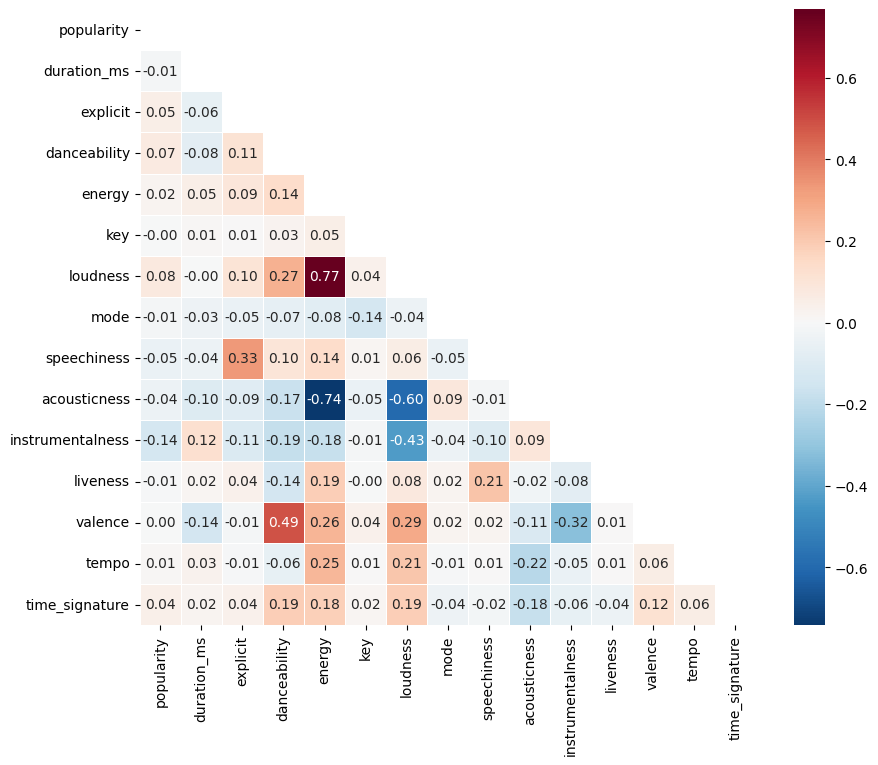

In [16]:
corr = songs.select_dtypes(exclude='object').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (10, 8))
sns.heatmap(corr, 
            mask = mask, 
            cmap = 'RdBu_r',
            annot = True,     
            fmt = ".2f",       
            center = 0,        
            square = True,     
            linewidths = .5)   

plt.show()


### Correlation plot
Out of this correlation plot we can see that we have two groups of variables:

Related to more energetic and dynamic music like:
- danceability,
- energy,
- loudness,
- valence

And those which more indicate more calm and instrumental music:
- acousticness,
- instrumentalness

Both groups are strongly **positively correlated within each other** e.g. loudness and energy 0.75 and **negatively correlated between those two groups** e.g. energy and acousticness with correlation of -0.73

In [17]:
numeric_cols = songs.select_dtypes(exclude='object')

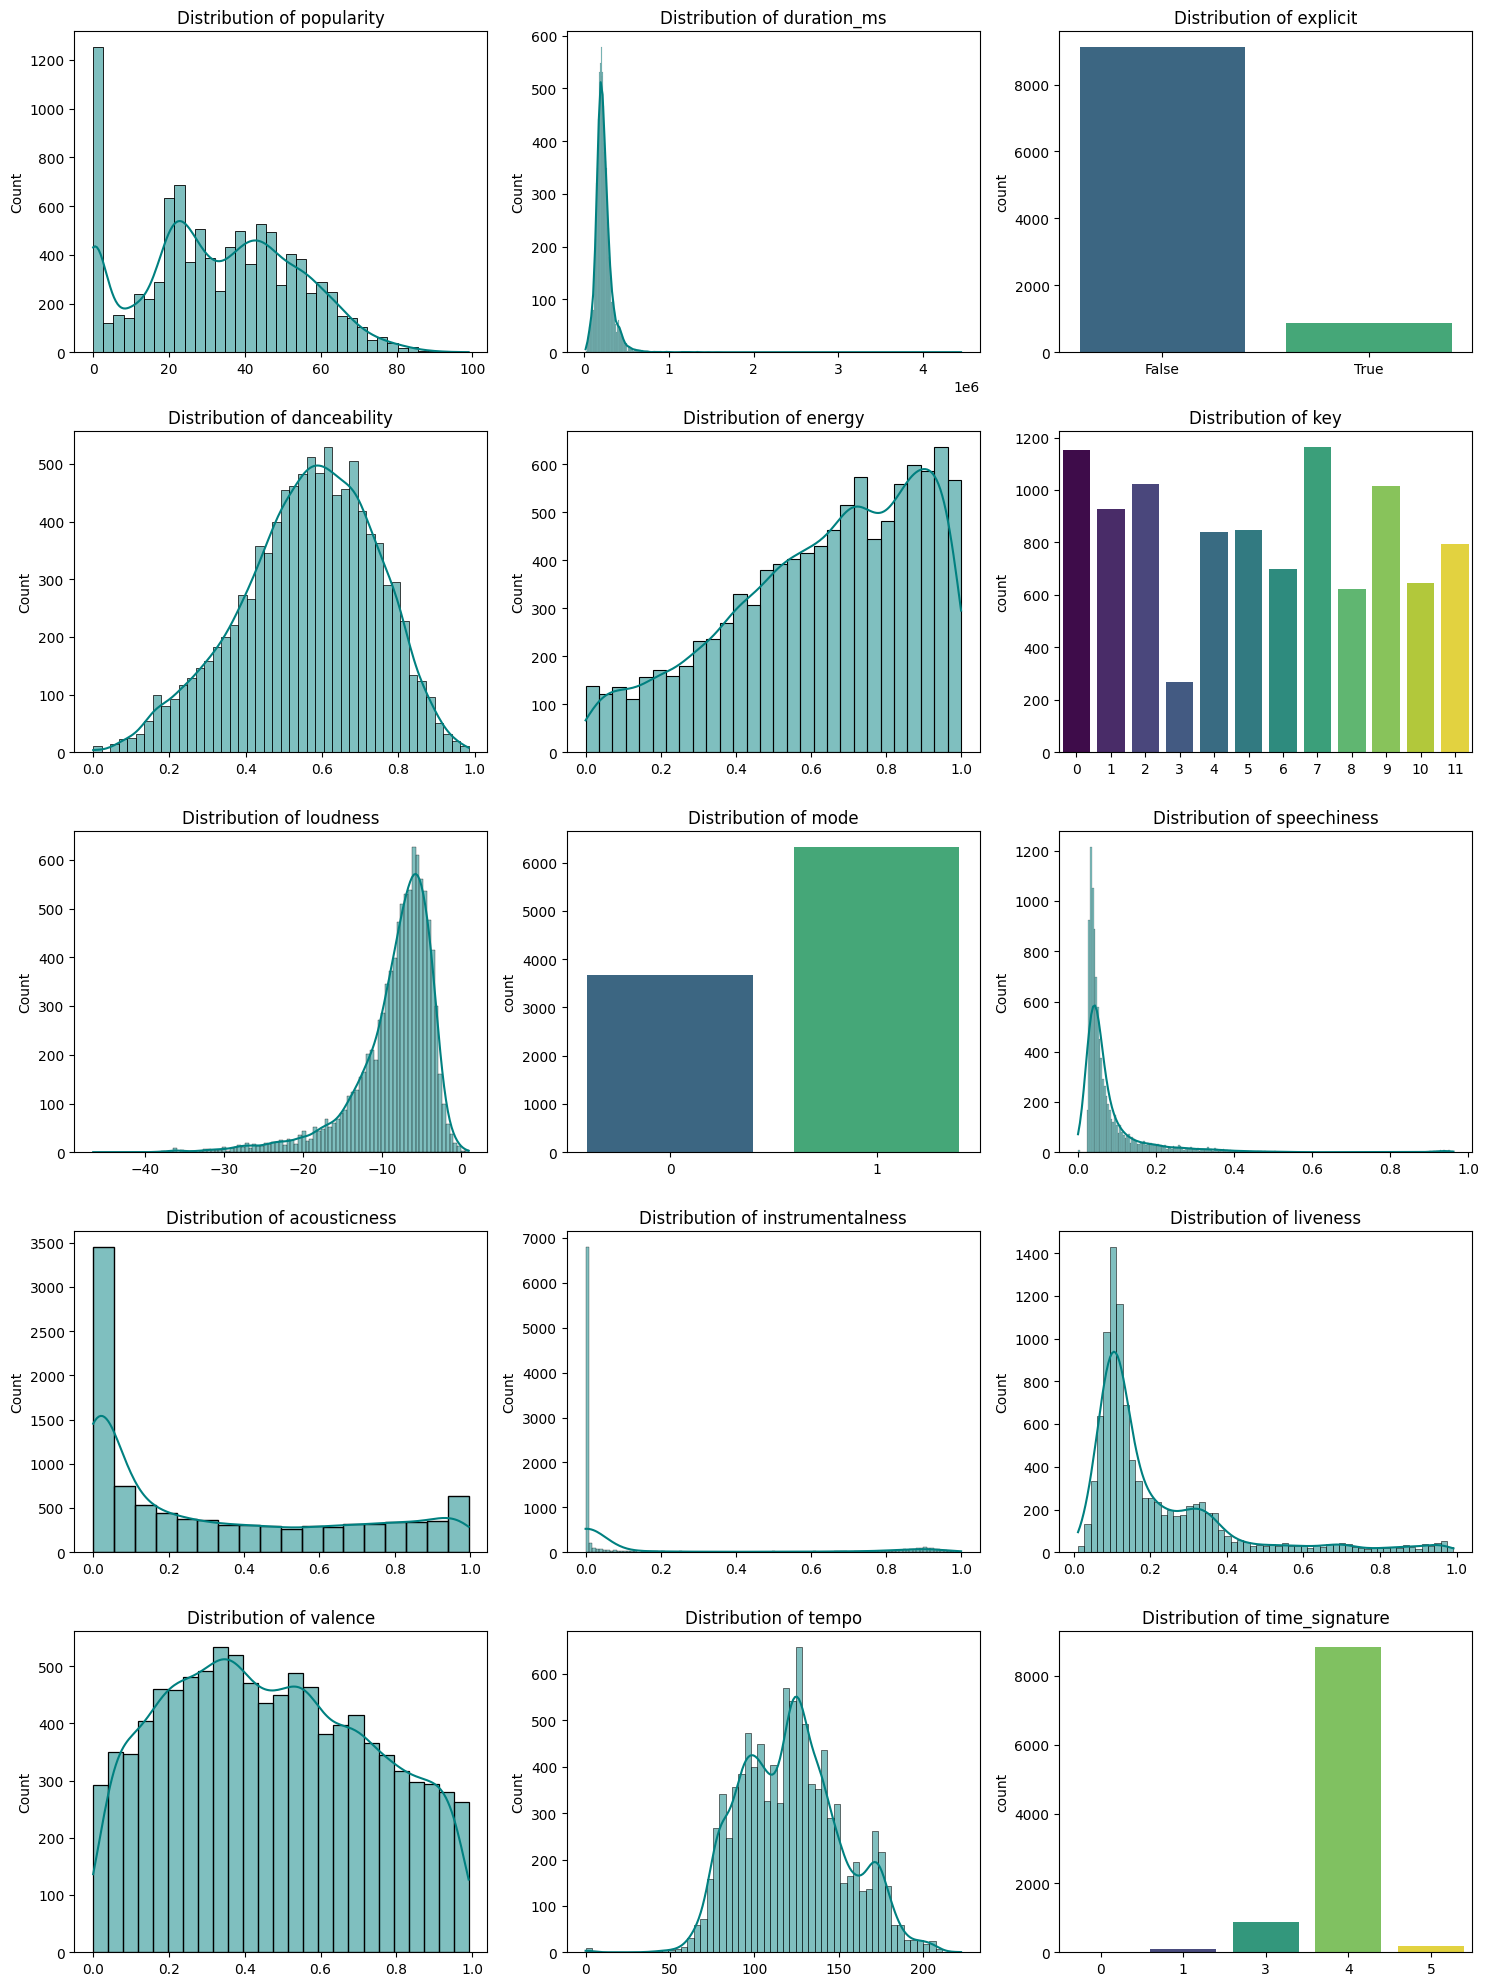

In [18]:
cols = 3
rows = math.ceil(len(numeric_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col_name in enumerate(numeric_cols):

    unique_vals = songs[col_name].nunique()
    
    if songs[col_name].dtype == 'bool' or unique_vals <= 12:
        sns.countplot(data=songs, x=col_name, ax=axes[i], palette='viridis', hue=col_name, legend=False)
        axes[i].set_title(f'Distribution of {col_name}')
    else:
        sns.histplot(songs[col_name], kde=True, ax=axes[i], color='teal')
        axes[i].set_title(f'Distribution of {col_name}')
    
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Distribution plots:
- most of the attributes in case of this songs sample are skewed
- acousticness is dominated by lower values, which means that most of the songs are non classical/rely more on dynamic
- energy, dancability and loudness are left skewed, which indicates that most of the songs are rather dynamic and energetic
- songs performed live are much less frequently observed than those in created in studio environment
- most of the songs can be described with the average tempo
- most of the songs in sample do not contain any explicit lyrics
- more than 60% of songs can be described as non instrumental, which means that most of songs contain more vocals 
- majority of songs contain speech but they are more about melodic line
- based on valence we can say that there are three groups of songs within this sample -> those more aggressive, peaking at 0.2, neutral peaking around 0.4 and more positive starting around 0.7

# <center> **Clustering** </center>

First, I will conduct clustering without reducing dimensions. Main goal of this, is to later compare and check if it's possible to reduce the number of features and not lose too much information.

In [19]:
songs.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

## <center> **Feature selection** </center>
Based on the correlation plot, distribution plots and domain knowledge I will be choosing 7 features for the conducting the clustering. Those are:
- danceability
- energy
- speechiness
- acousticness
- instrumentalness
- liveness
- valence

Those rejected are:
- popularity 
- key
- loudness
- mode
- tempo
- time signature




In [20]:
# choosing the features needed for clustering

features = [
'danceability',
'energy',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'valence'
 ]

# converting features into a numpy array so it will be easier for scikit-learn to work with the data
X = songs[features].to_numpy()

Befor making sure that the data is clusterable and checking for the number of cluster, data needs to be normalized

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Before clustering the data it is crucial to determine if the data can form any clusters, otherwise the algorithms will return noise. To measure the sample probability of forming meaningful clusters the Hopkins statistic can be utilized. 
It compares distances between points generated from uniform distribution and real data points. 
$$
H = \frac{\sum_{i=1}^{n} y_i}{\sum_{i=1}^{n} x_i + \sum_{i=1}^{n} y_i}
$$

Value of this statistic ranges from 0 to 1. In pyclustertend library the hopkins test is defined as:

$$
1 - H = \frac{\sum_{i=1}^{n} x_i}{\sum_{i=1}^{n} x_i + \sum_{i=1}^{n} y_i}
$$ 

(1 - 0.17) = 0.83, so for the case of the received result, it can be concluded that the selected dataset can be used for clustering and produce meaningful results. 

In [22]:
# hopkins score for pyclustertend is defined as 1 - hopkins stat, so the closer to 0, the more significant clusters there are
hopkins_score = round(hopkins(X_scaled, int(sample_size/10)),2)
test_result = 1 - hopkins_score

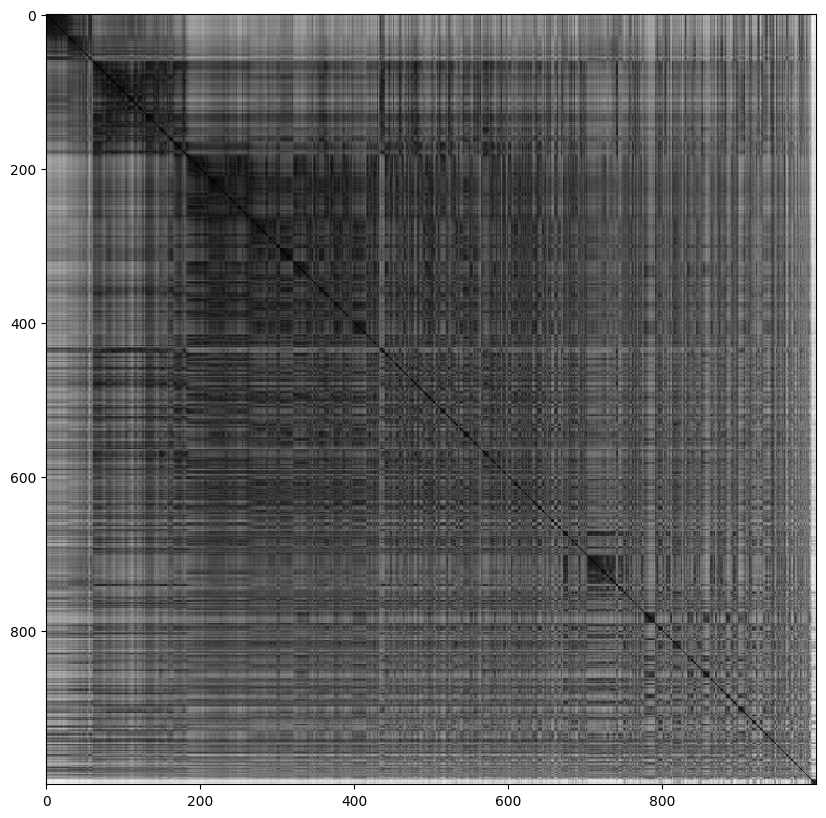

In [23]:
# getting sample for VAT chart
ind = np.random.choice(X_scaled.shape[0], 1000, replace=False)

ivat_subset = X_scaled[ind]

vat(ivat_subset)

Based on the results of inertia, silhouette score and gapstat below, it can be concluded that the optimal number of clusters is 7.  The decision is based on the silhouette score and inertia which shows diminishing returns the more clusters we choose.

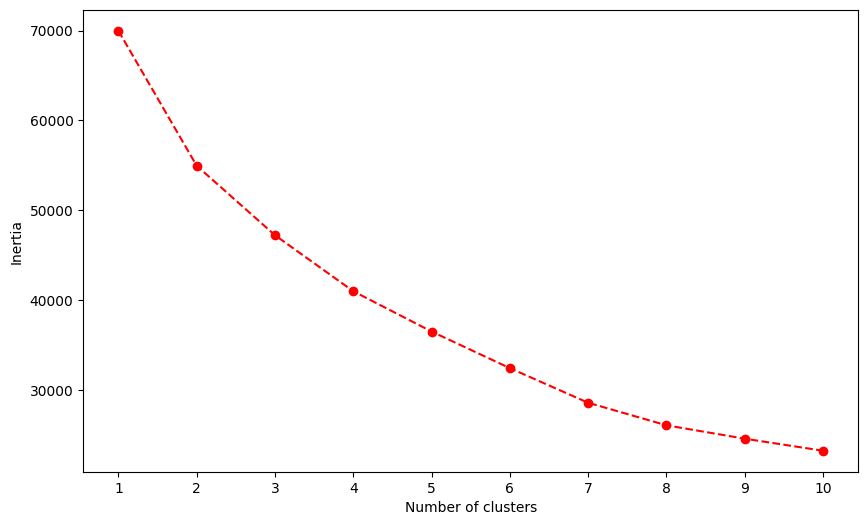

In [24]:
# calculating inertia for each supposed number of clusters
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 7, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plotting the elbow method   
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

[0.247, 0.209, 0.216, 0.23, 0.239, 0.248, 0.256, 0.231, 0.219]


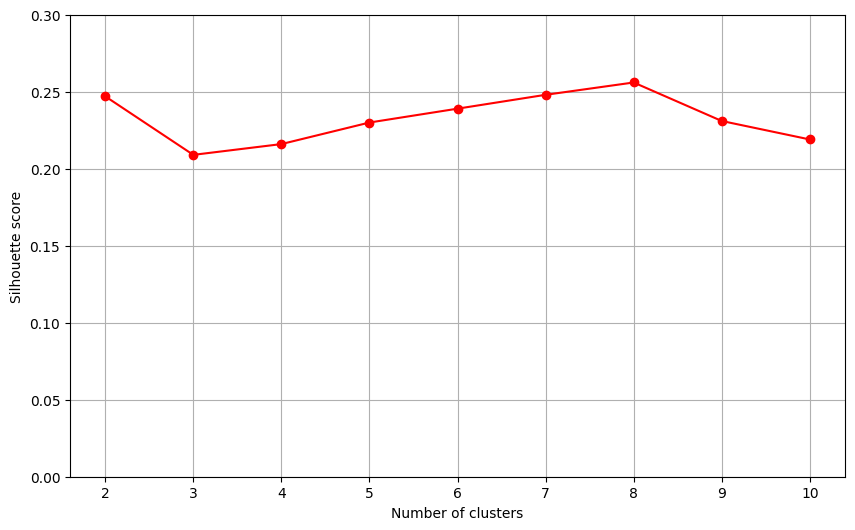

In [25]:
# initiating silhouette scores for max 10 clusters
sil_scores = []
k_range = range(2, 11) 

# calculating silhouette scores
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 7, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = round(silhouette_score(X_scaled, labels),3)
    sil_scores.append(score)

print(sil_scores)

# plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.ylim(0.00, 0.3)
plt.grid(visible=True)
plt.show()



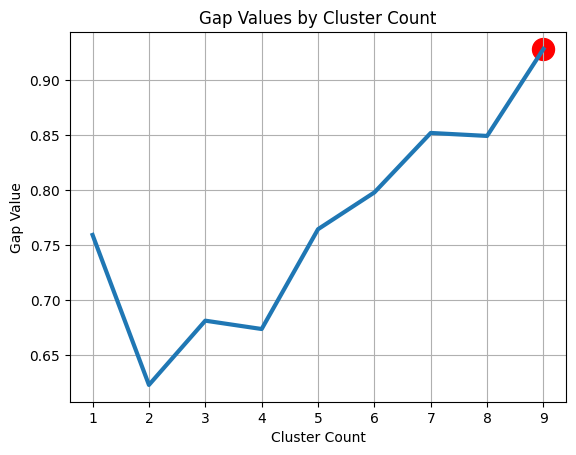

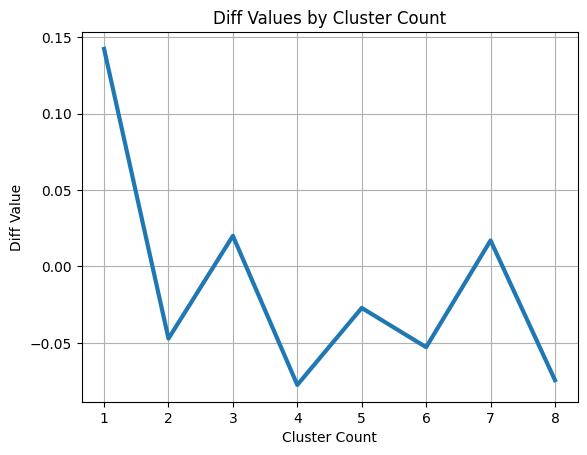

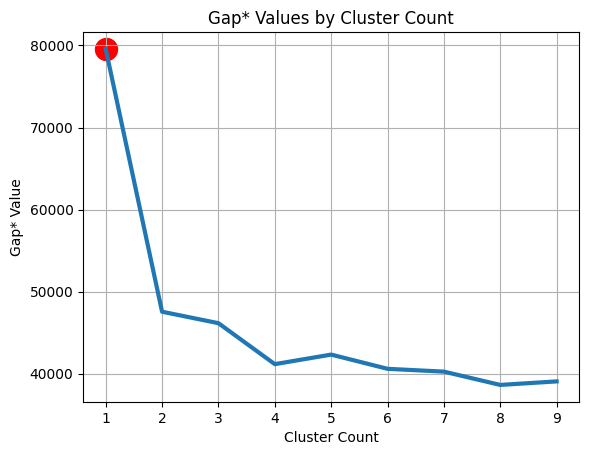

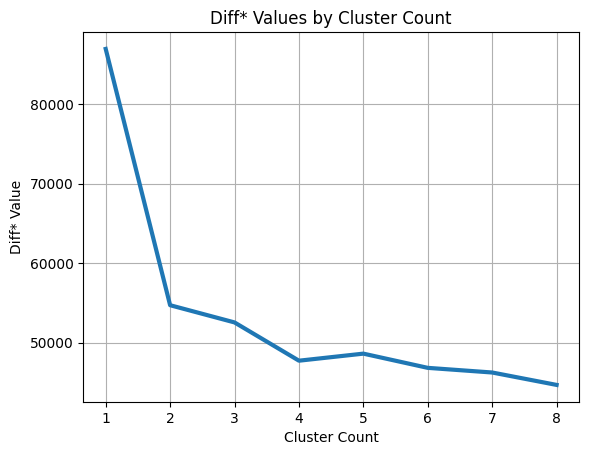

In [26]:
# calculating gap stat
optimalK = OptimalK(n_jobs = -1, parallel_backend = 'joblib')
n_clusters = optimalK(X_scaled, cluster_array = np.arange(1, 10))
optimalK.plot_results()
plt.show()

In [27]:
# choosing number of clusters and conducting kMeans
k = 7
kmeans = KMeans(n_clusters=k, random_state = 7, n_init=10)
songs['cluster'] = kmeans.fit_predict(X_scaled)
centers = kmeans.cluster_centers_


The visualization below presents 7 identified clusters. We can observe a transition between different music styles, which was anticipated due to the nature of mathematical music features. Most well set up clusters are number 3, 1 and 4. 

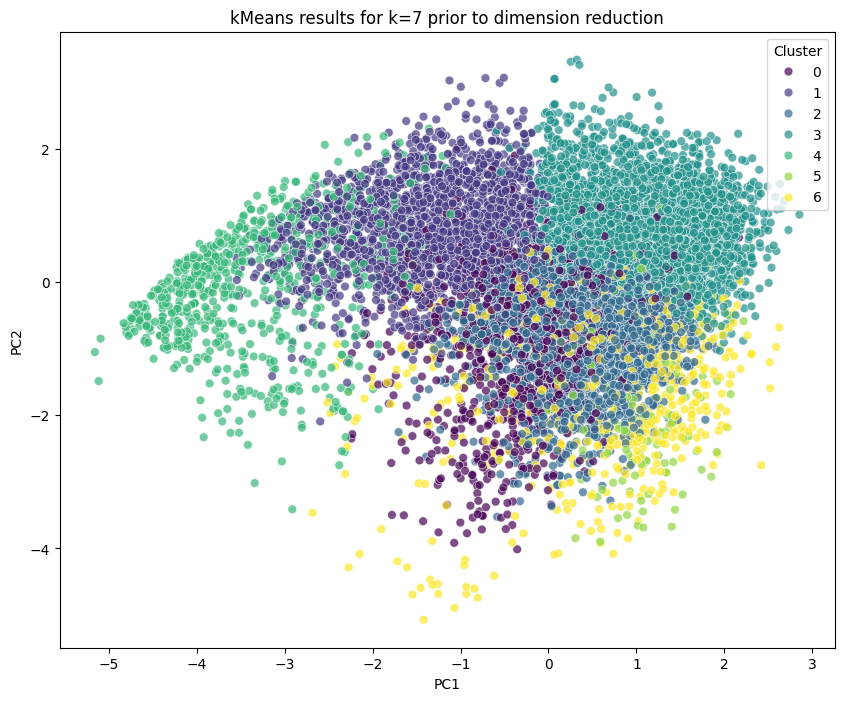

In [28]:
# getting the labels for clusters
clust_labels = kmeans.labels_ 

# preparing for visualization
pca_viz = PCA(n_components=2)
X_pca_viz = pca_viz.fit_transform(X_scaled)
kMeans_clustered = pd.DataFrame(data=X_pca_viz, columns=['PC1', 'PC2'])
kMeans_clustered['Cluster'] = clust_labels

# creating the plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=kMeans_clustered, 
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    palette='viridis', 
    alpha=0.7,
    s=40
)
plt.title(f'kMeans results for k={k} prior to dimension reduction')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

## <center> **Dimension reduction** </center>

The chart below displays level of explained variance by each component and in total. Looking at the the cumulative variance, we can see that 5 components are enough to preserve 90% of total variance in data sample. This allows succesfull conducting of dimension reduction
with minimal information loss.

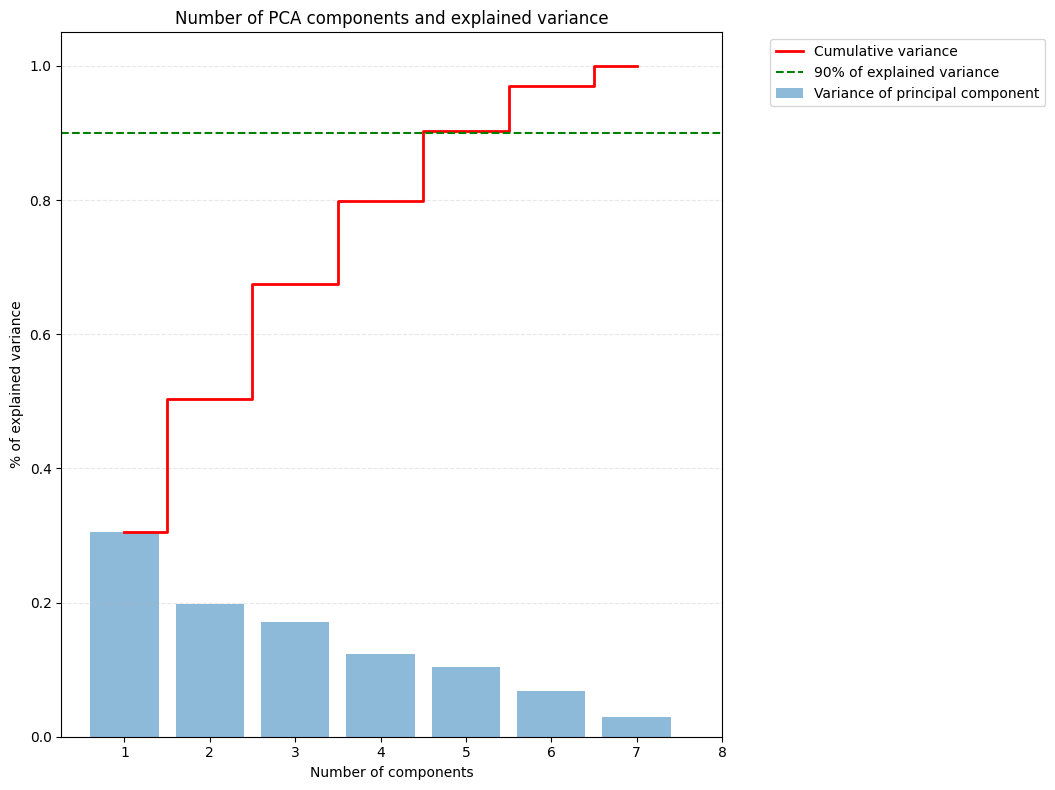

In [29]:
# fitting PCA
pca = PCA()
pca.fit(X_scaled)

# calculating explained variation per each principal component
exp_var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(exp_var_ratio)

# plotting
plt.figure(figsize=(12, 8))
plt.bar(range(1, 8), exp_var_ratio, alpha = 0.5, align = 'center', label = 'Variance of principal component')
plt.step(range(1, 8), cum_var_ratio, where = 'mid', label = 'Cumulative variance', color = 'red', lw = 2)
plt.axhline(y = 0.9, color = 'green', linestyle = '--', label = f'90% of explained variance')
plt.ylabel(f'% of explained variance')
plt.xlabel('Number of components')
plt.title('Number of PCA components and explained variance')
plt.xticks(range(1, 9))
plt.legend(bbox_to_anchor = (1.5, 1))
plt.grid(axis = 'y', linestyle = '--', alpha = 0.3)
plt.tight_layout()
plt.show()

In [30]:
# setting up PCA for 5 components as per variance chart
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
songs['PC1'] = X_pca[:, 0]
songs['PC2'] = X_pca[:, 1]

# clustering once again with reduced dimensions
kmeans = KMeans(n_clusters = 7, random_state = 7, n_init = 10)
songs['cluster_pca'] = kmeans.fit_predict(X_pca) 



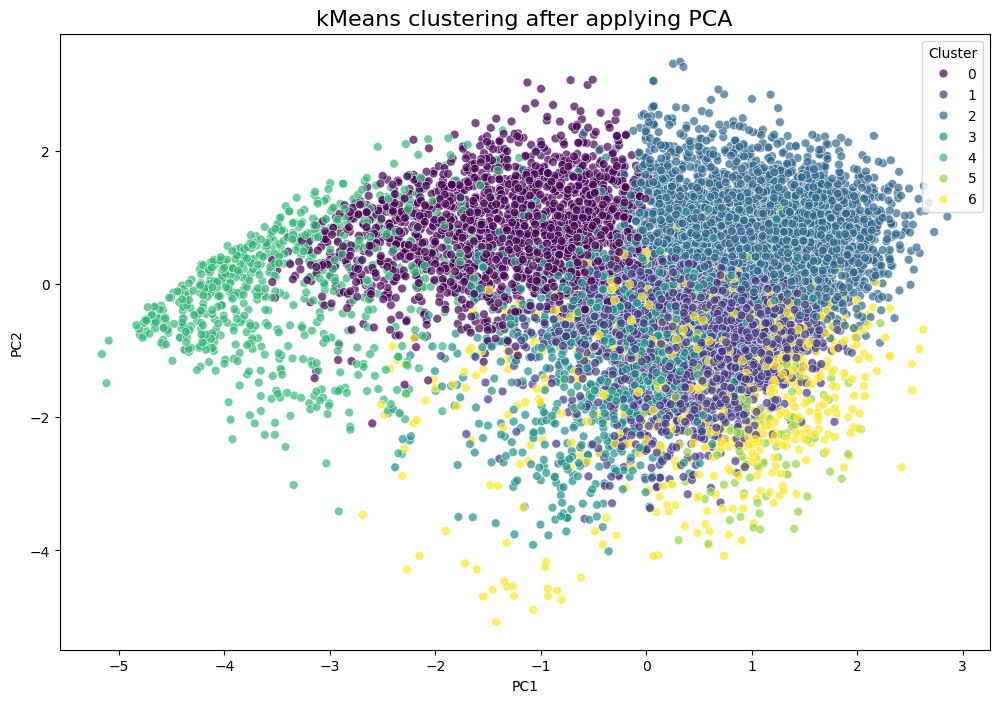

In [31]:
plt.figure(figsize = (12, 8))
sns.scatterplot(
    data=songs, 
    x = 'PC1', 
    y = 'PC2', 
    hue ='cluster_pca', 
    palette='viridis', 
    alpha = 0.7,
    s = 40
)
plt.title('kMeans clustering after applying PCA', fontsize = 16)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc = 'upper right')
plt.show()

In [32]:
labels = songs['cluster']
labels_pca = songs['cluster_pca']
ari_score = adjusted_rand_score(labels, labels_pca)
ari_score

0.9509528526434494

The Adjusted Rand Index score of 0.95 indicates that the clustering results after Principal Component Analysis are consistent. Stability of the clustaring is confirmed by the comparison of both cluster setups. They showcase similar results when it comes to structure of 
the clusters, which means that the variance removed from the model was actually redundant information. Model with reduced dimensions benefits from lower computational complexity, yet it does not sacrifice its meaningfulness. 

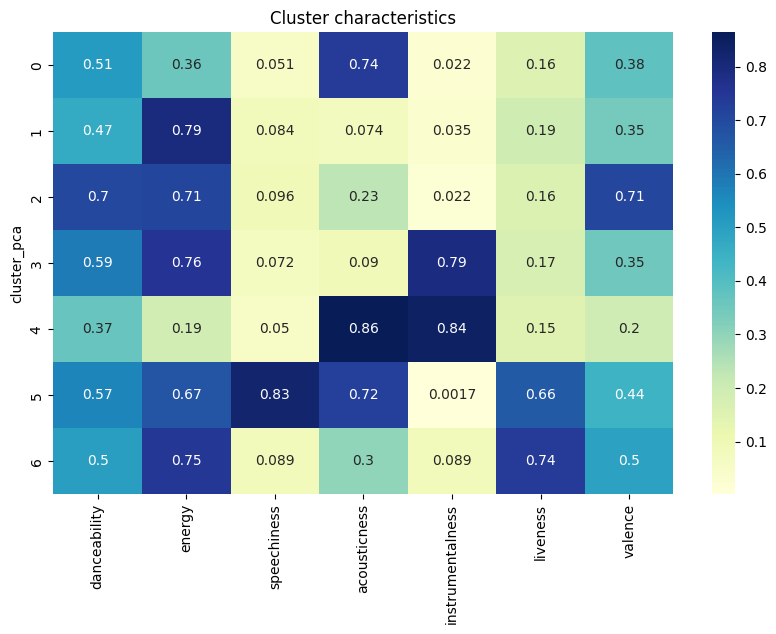

In [33]:
# calculating average value of features in clusters
cluster_analysis = songs.groupby('cluster_pca')[features].mean()

plt.figure(figsize = (10, 6))
sns.heatmap(cluster_analysis, annot = True, cmap = 'YlGnBu')
plt.title('Cluster characteristics')
plt.show()

In [34]:
genre_by_cluster = songs.groupby(by='cluster_pca')['track_genre'].value_counts().reset_index(name='number_of_songs')

# <center> **Insights** </center>

#### Based on the conducted analysis and clustering it can be concluded that in this sample we can observe 7 clusters:

- **Cluster 0 - Calming music**
    - high acousticness
    - low to medium energy
    - good for working or studying

- **Cluster 1 - harder sounds, guitar**
  - high energy
  - mostly hard rock, black metal, metal or punk
  - good for gym workouts
  
- **Cluster 2 - mainstream music**
  - more POP music, dance and latino
  - high dancability, energy and valence 
  - music played on the radio

- **Cluster 3 - EDM**
  - high instrumentalness which is specific for EDM
  - high energy and dancability
  - low speechiness
  - party music
  
- **Cluster 4 - Classical and film music**
  - high acousticness
  - high instrumentalness 
  - low energy compared to other clusters

- **Cluster 5 - Rap and podcasts**
  - high speechiness 
  - high liveness 
  - workout and podcasts

- **Cluster 6 - live music** 
  - high acousticness
  - highest liveness
  - tracks from concerts and live shows




Clustering music tracks is a difficult task especially considering nature of musical data. Multiple features including valence, dancability or instrumentalness are quite fluid when it comes to differences between different music types. Additionally music is really subjective and to determine clear clusters within selected sample was not the easiest. Music features and mathematical approach do not take overall cultural context and setting into account. Different listeners may perceive the same song as two different types or genres.
Sometimes more sad dance tracks can have similar technical features to ballads yet be perceived in absolutely different manner.



